In [8]:
### REQUIRED IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# Problem Statement:
*(padma: I attempted to define our goals for this notebook - feel free to edit/add/subtract!)*

 We wish to measure an unknown quantity - Phil's height, parameterized as $\theta$. We make 1000 measurements of $\theta$ and this is our data $x$. The distribution of this data should depend on the true value of $\theta$ and provide us with information on the same. In this notebook, we will explore Frequentist and Bayesian methods to arrive at our parameter of interest with well-understood uncertainties.

*padma: I like the idea of defining steps!*

**Step 1:** Generate a datset of 1000 values ranging from 1 to 10 and randomly sample from 10 and calculate a mean from that sample.

*padma: why ranging from 1 to 10? Why are we sampling 10 values from a larger dataset? I think we might need to explain the reasoning for every cell of code before the cell* 

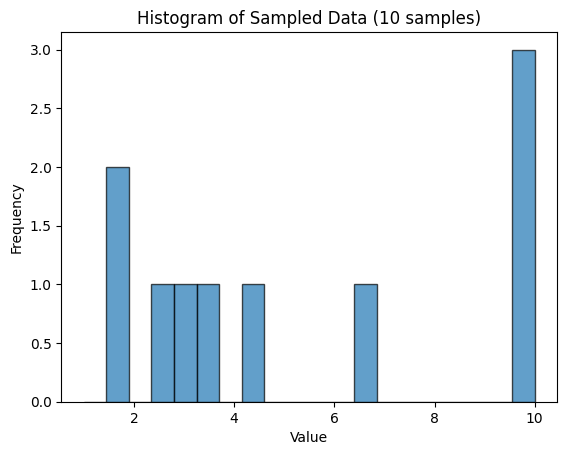

In [10]:
# Generate random mean
random_mean = np.random.randint(0, 100)

# Generate random dataset between 1 and 10
dataset_size = 1000
random_dataset = np.random.uniform(1, 10, dataset_size)

# Randomly sample from the dataset 100 times
sample_size = 10
sampled_data = np.random.choice(random_dataset, size=sample_size, replace=False)

# Plot a histogram of the sampled data
plt.hist(sampled_data, bins=20, range=(1, 10), edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sampled Data (10 samples)')
plt.show()

**Step 2:** Calculate the mean and standard deviation from the sampled data

*padma: in the cell below, maybe we can attempt to show the reader how the `sampled_data`'s mean and standard deviation will be different `random_dataset`'s mean and standard deviation?*

In [11]:
sample_mean = np.mean(sampled_data)
sample_std_dev = np.std(sampled_data)
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std_dev)

Sample Mean: 5.257720605076236
Sample Standard Deviation: 3.1905350852239023


*padma: hardcoding in values into markdown might not work!*

From the randomly sampled points in the dataset the calculated mean is 6.70 and the standard deviation is .63 

# Likelihood Function



*padma: maybe we can first introduce the general function for likelihood ($p (x_i ; \theta)$) first?*
 
Much of frequentist statistic is maximizing the likelihood function. 

Likelihood function for a Gaussian distribution:

$$
L(x \,|\, \mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{x_i - \mu}{\sigma}\right)^2\right)
$$

This equation represents the likelihood function for a Gaussian distribution, where:
* $x$ is the observed data, 
* $\mu$ is the mean parameter, 
* $\sigma$ is the standard deviation parameter, and 
* $n$ is the number of observations. 

The function calculates the probability of observing the given data $x$ under a Gaussian distribution with parameters $\mu$ and $\sigma$.

In [14]:

# padma: sorry this is very minor, but some of the steps are out of order, I think this might make it confusing to the reader
# Step 6: Calculate the likelihood function for both the actual mean and the sample mean
likelihood_values = np.linspace(0, 100, 1000)  # Range of possible mean values

# Likelihood function for the actual mean
# padma: fixed_std_dev needs to be defined before this
actual_likelihood_function = np.exp(-0.5 * ((likelihood_values - random_mean) / fixed_std_dev) ** 2) / (fixed_std_dev * np.sqrt(2 * np.pi))

# Likelihood function for the sample mean
sample_likelihood_function = np.exp(-0.5 * ((likelihood_values - sample_mean) / sample_std_dev) ** 2) / (sample_std_dev * np.sqrt(2 * np.pi))

# Step 7: Plot the likelihood functions
plt.plot(likelihood_values, actual_likelihood_function, color='blue', label='Actual Mean Likelihood')
plt.plot(likelihood_values, sample_likelihood_function, color='red', label='Sample Mean Likelihood')
plt.xlabel('Mean')
plt.ylabel('Likelihood')
plt.title('Likelihood Functions')
plt.legend()
plt.show()

NameError: name 'fixed_std_dev' is not defined

# Bayesian


In [13]:
# Step 2: Randomly sample from the dataset
sample_size = 10
sampled_data = np.random.choice(random_dataset, size=sample_size, replace=False)

# Step 3: Define the prior distribution for the mean
prior_mean = 5  # Prior mean
prior_std_dev = 2  # Prior standard deviation

# Step 4: Update the prior using the observed data to obtain the posterior distribution
posterior_mean = (prior_std_dev**2 * np.mean(sampled_data) + fixed_std_dev**2 * prior_mean) / \
    (prior_std_dev**2 + fixed_std_dev**2)
posterior_std_dev = np.sqrt((prior_std_dev**2 * fixed_std_dev**2) / (prior_std_dev**2 + fixed_std_dev**2))

# Step 5: Plot the prior, likelihood, and posterior distributions
x = np.linspace(0, 100, 1000)
prior_distribution = norm.pdf(x, prior_mean, prior_std_dev)
posterior_distribution = norm.pdf(x, posterior_mean, posterior_std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, prior_distribution, label='Prior', color='blue')
plt.plot(x, posterior_distribution, label='Posterior', color='red')

# Plot vertical lines for prior mean and posterior mean
plt.axvline(x=prior_mean, color='blue', linestyle='--', label='Prior Mean')
plt.axvline(x=posterior_mean, color='red', linestyle='--', label='Posterior Mean')

plt.xlabel('Mean')
plt.ylabel('Density')
plt.title('Bayesian Inference for Mean Estimation')
plt.legend()
plt.show()

NameError: name 'fixed_std_dev' is not defined